In [281]:
import sys
assert sys.version_info >= (3,5)

# 사이킷런 >=0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [282]:
# 시각화
# 그림을 저장할 위치 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ml_project_2"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "."+fig_extension)
    print("그림 저장: ",fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action = "ignore", message="^internal gelsd")

In [283]:
import pandas as pd

PROJECT_ROOT_DIR = "."
FILE_PATH = os.path.join(PROJECT_ROOT_DIR, "project_datasets")

def load_data(file_path=FILE_PATH):   
    csv_path = os.path.join(file_path, "winequalityN.csv")
    return pd.read_csv(csv_path, encoding='cp949', low_memory=False)  # 한글깨짐 방지

raw_df = load_data()
raw_df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# 1. raw_df 데이터 확인하기

In [284]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [270]:
raw_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### raw_df 의 모든 feature 요약 정보

In [246]:
# 모든 숫자형 특성의 요약 정보
raw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### raw_df 의 모든 feature 히스토그램

그림 저장:  attribute_histogram_plots


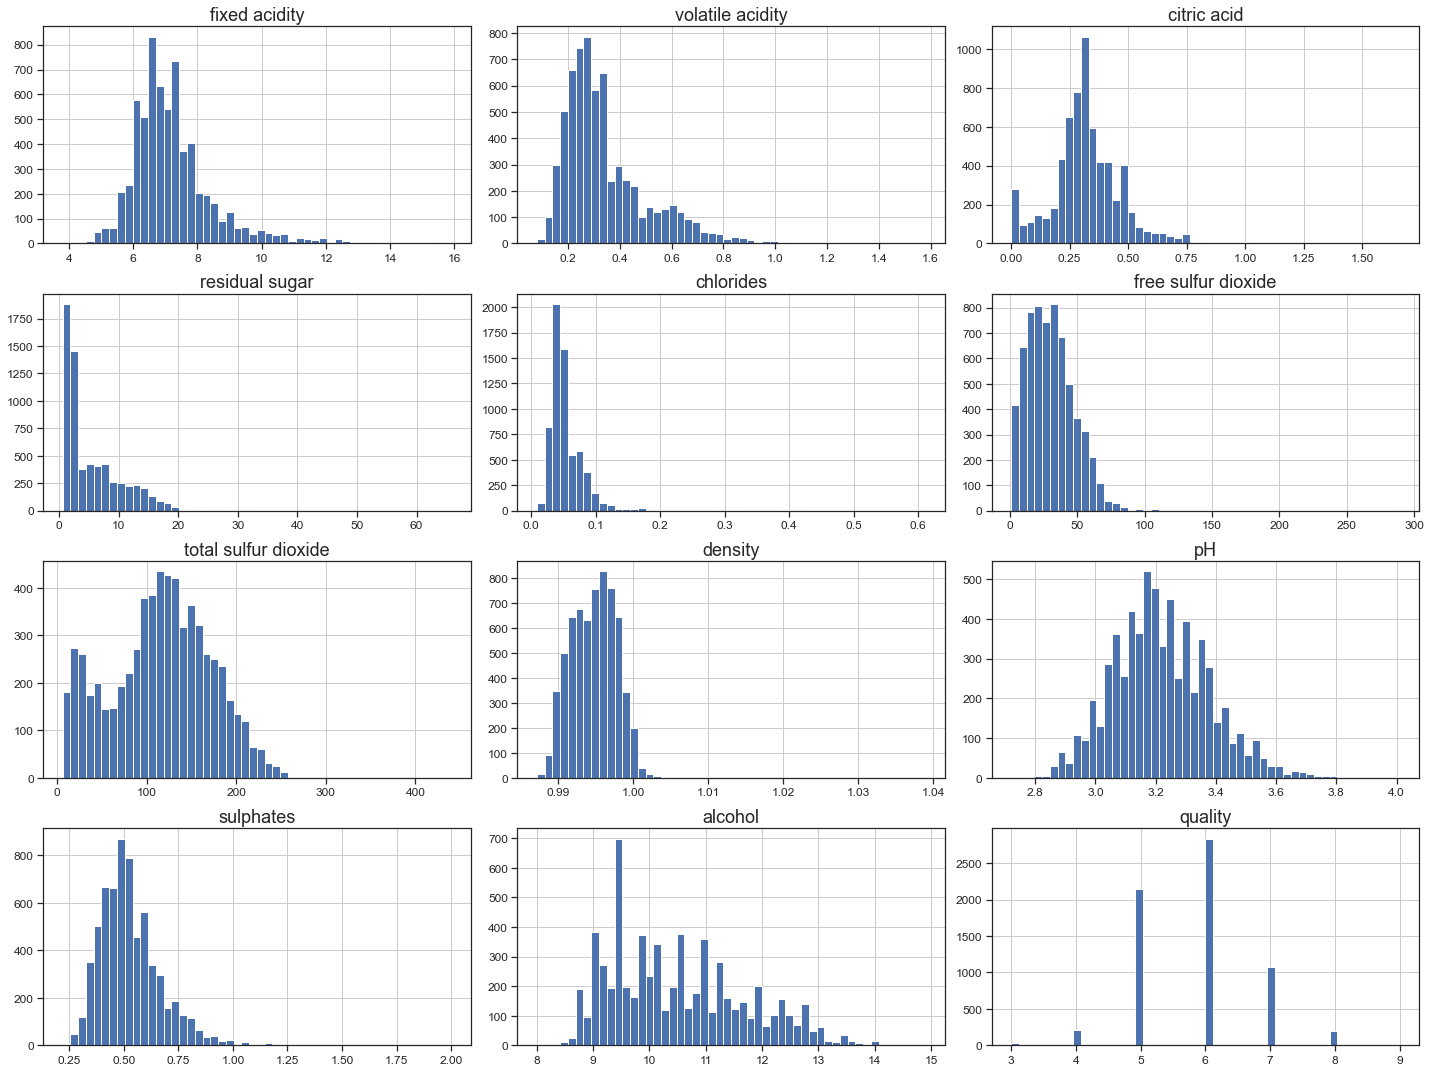

In [247]:
# 모든 숫자형 특성의 히스토그램
%matplotlib inline
import matplotlib.pyplot as plt
raw_df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# 2. EDA

### wines 로 copy

In [285]:
wines = raw_df.copy()
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### null값 확인 및 mean(평균)으로 대체

In [286]:
wines = wines.fillna(wines.mean())

In [287]:
wines.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [288]:
wines.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


### quality 를 low, medium, high 로 나눠서 quality_label 만들기

In [289]:
wines['quality_label'] = wines.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 6 else 'high')


### feature별 상관관계 분석

In [252]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines.quality_label.map(class_ql)

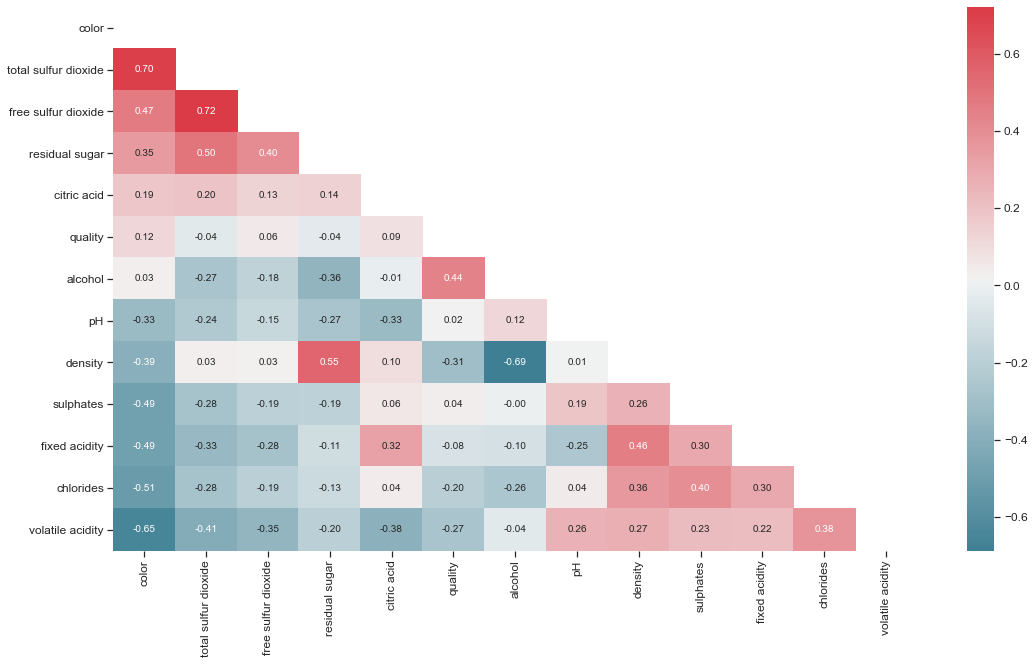

In [203]:
corr = wines.corr()
top_corr_cols = corr.color.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

### 1) 다운샘플링 이전 - 타입별(red, white) 데이터 분포도 확인

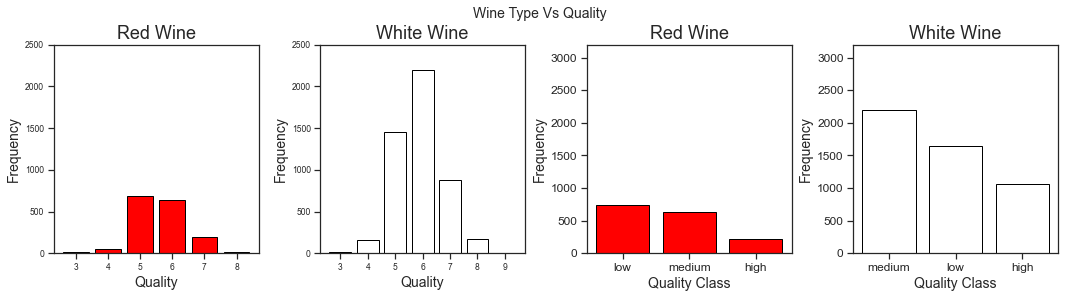

In [253]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = wines.quality[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = wines.quality[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = wines.quality_label[wines.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = wines.quality_label[wines.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

### 2) 다운샘플링 이전 - 타입별(red, white) 통계 분석

In [254]:
subset_attributes = wines.columns
rs = round(wines.loc[wines.type == 'red', subset_attributes].describe(), 2)
ws = round(wines.loc[wines.type == 'white', subset_attributes].describe(), 2)
pd.concat([rs, ws], axis = 0, keys = ['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   
color                             1599.0   0.00   0.00  0.00   0.00   0.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.86   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   
color                  0.00    0.00                4898.0    1.00   0.00   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00  
color                 1.00    1.00    1.00    1.00    1.00

### 3) 다운샘플링 이전 - 품질별(low, medium, high) 통계 분석

In [290]:
ls = round(wines[wines['quality_label'] == 'low'][wines.columns].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][wines.columns].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][wines.columns].describe(),2)
#pd.concat([ls, ms, hs], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T

In [291]:
#LOW Quality wine
pd.concat([ls], axis=0, keys=['Low Quality Wine']).T

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                      
                         75%     max  
fixed acidity           7.80   15.90  
volatile acidity        0.50    1.58  
citric acid             0.40    1.00  
residual sugar          8.52   23.50  
chlorides               0.08    0.61  
free sulfur dioxide    42.00  289.00  
total sulfur dioxide  167.00  440.00  
density                 1.00    1.00  
pH                      3.31    3.90  
sulphates               0.58    2.00  
alcohol                10.40   14.90  
quality                 5.00    5.00

In [292]:
#Medium Quality wine
pd.concat([ms], axis=0, keys=['Medium Quality Wine']).T

Medium Quality Wine                                      \
                                   count    mean    std   min    25%     50%   
fixed acidity                     2836.0    7.18   1.29  3.80   6.40    6.90   
volatile acidity                  2836.0    0.31   0.15  0.08   0.21    0.27   
citric acid                       2836.0    0.32   0.14  0.00   0.26    0.31   
residual sugar                    2836.0    5.55   4.89  0.70   1.80    3.15   
chlorides                         2836.0    0.05   0.03  0.02   0.04    0.05   
free sulfur dioxide               2836.0   31.17  16.84  1.00  18.00   29.00   
total sulfur dioxide              2836.0  115.41  55.45  6.00  79.00  117.00   
density                           2836.0    0.99   0.00  0.99   0.99    0.99   
pH                                2836.0    3.22   0.16  2.72   3.11    3.21   
sulphates                         2836.0    0.53   0.15  0.23   0.43    0.51   
alcohol                           2836.0   10.59   1.13  8.40   9.60   10.50   
quality                           2836.0    6.00   0.00  6.00   6.00    6.00   

                                      
                         75%     max  
fixed acidity           7.60   14.30  
volatile acidity        0.37    1.04  
citric acid             0.39    1.66  
residual sugar          8.30   65.80  
chlorides               0.06    0.42  
free sulfur dioxide    42.00  112.00  
total sulfur dioxide  156.00  294.00  
density                 1.00    1.04  
pH                      3.32    4.01  
sulphates               0.60    1.95  
alcohol                11.40   14.00  
quality                 6.00    6.00

In [293]:
#High Quality wine
pd.concat([hs], axis=0, keys=['High Quality Wine']).T

High Quality Wine                                      \
                                 count    mean    std   min    25%     50%   
fixed acidity                   1277.0    7.09   1.34  3.90   6.30    6.90   
volatile acidity                1277.0    0.29   0.12  0.08   0.20    0.27   
citric acid                     1277.0    0.33   0.11  0.00   0.28    0.32   
residual sugar                  1277.0    4.83   4.06  0.80   1.80    2.90   
chlorides                       1277.0    0.04   0.02  0.01   0.03    0.04   
free sulfur dioxide             1277.0   31.06  15.34  3.00  20.00   31.00   
total sulfur dioxide            1277.0  109.89  47.13  7.00  87.00  114.00   
density                         1277.0    0.99   0.00  0.99   0.99    0.99   
pH                              1277.0    3.23   0.16  2.84   3.12    3.22   
sulphates                       1277.0    0.54   0.16  0.22   0.42    0.51   
alcohol                         1277.0   11.43   1.22  8.50  10.70   11.50   
quality                         1277.0    7.16   0.38  7.00   7.00    7.00   

                                      
                         75%     max  
fixed acidity           7.40   15.60  
volatile acidity        0.34    0.92  
citric acid             0.38    0.76  
residual sugar          6.50   19.25  
chlorides               0.05    0.36  
free sulfur dioxide    40.00  108.00  
total sulfur dioxide  140.00  289.00  
density                 1.00    1.00  
pH                      3.34    3.82  
sulphates               0.64    1.36  
alcohol                12.40   14.20  
quality                 7.00    9.00


### 0-0) 불필요한 column 삭제

In [294]:
# type -> color / quality -> quality_label로 변경했으므로 삭제
wines = wines.drop(['type','quality'], axis=1)

### 0-2) low, medium, high 예측문제
- X_quality: quality 데이터의 X
- Y_quality: quality 데이터의 label

- X_train_quality, X_test_quality: quality X 데이터의 train, test 데이터
- Y_train_quality, Y_test_quality: quality label 데이터의 train, test 데이터

In [295]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


In [296]:
# split
X_train_quality, X_test_quality, Y_train_quality, Y_test_quality = train_test_split(X_quality, Y_quality, test_size=0.2, random_state=321)


In [297]:
print("X_train_quality.shape: ", X_train_quality.shape)
print("Y_train_quality.shape: ", Y_train_quality.shape)
print("X_test_quality.shape: ", X_test_quality.shape)
print("Y_test_quality.shape: ", Y_test_quality.shape)

X_train_quality.shape:  (5197, 12)
Y_train_quality.shape:  (5197,)
X_test_quality.shape:  (1300, 12)
Y_test_quality.shape:  (1300,)


In [298]:
wines.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')

In [299]:
X_train_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
2281,5.0,0.33,0.23,11.8,0.030,23.0,158.0,0.99322,3.41,0.64,11.8,1
3652,8.9,0.84,0.34,1.4,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,0
3364,7.8,0.27,0.28,1.8,0.050,21.0,127.0,0.99340,3.15,0.44,9.9,1
5127,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,0
3492,7.2,0.32,0.40,8.7,0.038,45.0,154.0,0.99568,3.20,0.47,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,1
3784,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,0
5929,6.6,0.23,0.37,8.5,0.036,46.0,153.0,0.99576,3.20,0.48,9.4,1
2847,6.5,0.53,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,0


### Decision Tree

In [300]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [329]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)


In [330]:
#훈련데이터로 학습시키기/ 사전 가지치기 
tree_clf.fit(X_train_quality,Y_train_quality) #feature, target

print("훈련 세트 점수: {:.3f}".format(tree_clf.score(X_train_quality, Y_train_quality)))

print("테스트 세트 점수: {:.3f}".format(tree_clf.score(X_test_quality, Y_test_quality)))
# 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선 

훈련 세트 점수: 0.556
테스트 세트 점수: 0.549


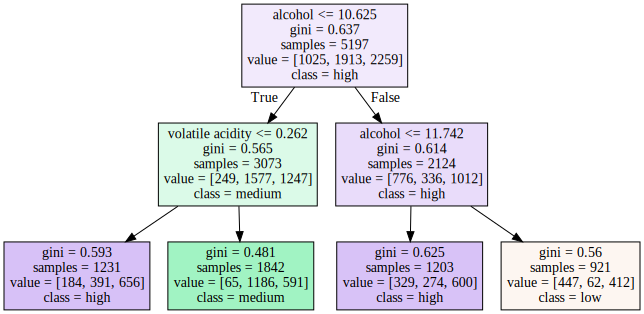

In [333]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file=os.path.join(IMAGES_PATH, "decisionTree.dot"),
                feature_names =  X_train_quality.keys(),
                class_names =["low","medium","high"],
                filled =True
               )

Source.from_file(os.path.join(IMAGES_PATH, "decisionTree.dot"))


In [304]:
#feature_importance
feature_imp = tree_clf.feature_importances_
print('{}'.format(feature_imp))

[0.05999821 0.11804501 0.06815415 0.06408158 0.09976212 0.08272028
 0.09119986 0.0728415  0.08228007 0.09300636 0.16760612 0.00030475]


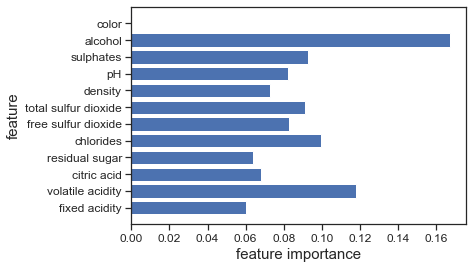

In [305]:
#feature_importance 시각화
n_feature = X_quality.shape[1]

idx = np.arange(n_feature)



plt.barh(idx, feature_imp, align='center')

plt.yticks(idx,  X_train_quality.keys())

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [139]:
from sklearn import metrics, tree
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel


In [140]:
# ['red', 'white']
def get_results(model, name, data, true_labels, target_names, results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(wtp_dnn_model.history.history['val_acc'])
        predicted_labels = model.predict_classes(data) 
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    interpreter = Interpretation(data, feature_names=cols)
    plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results

def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    
   # level_labels = [total_classes*[0], list(range(total_classes))]
    
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names] ), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names])) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
#     display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return prob, y_score, roc_auc

In [141]:
wqp_class_labels = np.array(wines['quality_label'])
target_names = ['low', 'medium', 'high']


# cols = wines.columns
# cols = list(cols.drop(['type', 'quality_label', 'quality']))
# X_train, X_test, y_train, y_test = train_test_split(wines.loc[:, cols], y_ql.values, test_size=0.20, random_state=101)

In [142]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline

tree_clf = Pipeline([
        ('tree_clf', DecisionTreeClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] # [15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'tree_clf__class_weight': class_weight
      ,'tree_clf__criterion': criterion
      ,'tree_clf__splitter': splitter
      ,'tree_clf__max_depth': max_depth
      ,'tree_clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=tree_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
DT = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train_quality,Y_train_quality)

results = get_results(DT, 'DT First', X_test_quality, Y_test_quality, target_names, reasume=True)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.3s


Mean Best Accuracy: 60.75%
------------------------------------------------------------
Best Parameters:
{'tree_clf__class_weight': None, 'tree_clf__criterion': 'entropy', 'tree_clf__max_depth': 11, 'tree_clf__min_samples_leaf': 2, 'tree_clf__splitter': 'best'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  59.92% 
Precision: 59.84% 
Recall:    59.92% 
F1 Score:  59.70% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.54      0.61      0.57       252
      medium       0.64      0.70      0.67       471
        high       0.59      0.51      0.55       577

    accuracy                           0.60      1300
   macro avg       0.59      0.61      0.60      1300
weighted avg       0.60      0.60      0.60      1300


Prediction Confusion Matrix:
------------------------------


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.4s finished


TypeError: list indices must be integers or slices, not str

In [99]:
from sklearn.model_selection import cross_val_predict

In [100]:
y_trained_pred = cross_val_predict(sgd_clf, X_train_quality, Y_train_quality, cv=3, method="decision_function")

y_probas_tree = cross_val_predict(tree_clf, X_train_quality, Y_train_quality, cv=3, method="predict_proba")

NameError: name 'sgd_clf' is not defined

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_type, y_scores_forest)

In [ ]:
def plot_roc_curve(fpr, tpr, label_None):
plt.plot(fpr, tpr, linewidth=2, label=label)
plt.plot([0, 1], [0, 1], 'k--')

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

##### feature importance 값은 alcohol이 중요하다고 알려주지만 이 값이 양성인지 음성인지는 알 수 없고 feature_importance 값이 낮다고 해서 다른 특성들이 유용하지 않다는 뜻은 아니다. 단지 이 tree 가 특성을 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 가지고 있어서 일수도 있음

In [39]:
# 붓꽃 결정 트리의 결정 경계 그리기
from matplotlib.colors import ListedColormap

def plot_decision_boundary(tree_clf, X_train_quality, Y_train_quality, axes=[0, 7.5, 0, 3], wines=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree_clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not wines:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="low")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="medium")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="high")
        plt.axis(axes)
    if wines:
        plt.xlabel("alchol", fontsize=14)
        plt.ylabel("volatile acidity", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf,X_train_quality , Y_train_quality)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 2 

<Figure size 576x288 with 0 Axes>

### 성능 측정 

In [166]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

In [167]:
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train_quality, Y_train_quality)
y_score = clf.predict_proba(X_test_quality)

C:\Users\aro\anaconda3\envs\envexample\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
C:\Users\aro\anaconda3\envs\envexample\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\Users\aro\anaconda3\envs\envexample\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))


C:\Users\aro\anaconda3\envs\envexample\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


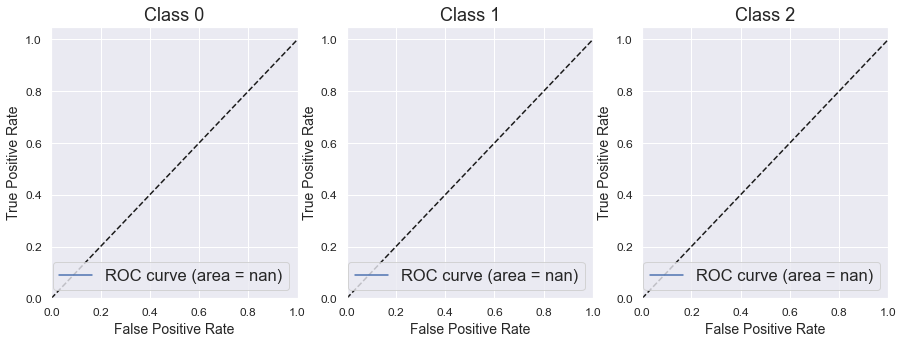

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [168]:


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_quality[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(Y_test_quality, y_score,multi_class='raise' ))  #multi_class='raise'

In [143]:
from sklearn.model_selection import GridSearchCV 

tree_para={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
# param_grid = [ 
#     {'criterion':['gini','entropy'],'max_depth':[4,5,6,7]}, 
#     {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}  
# ]

# forest_clas = DecisionTreeClassifier(random_state=42)

# grid_search = GridSearchCV(tree_clf, param_grid, cv = 5,
#                           scoring='neg_mean_squared_error',
#                           return_train_score=True)  
model_c=clf.fit(X_train_quality, Y_train_quality)
model_c.predict(X_test_quality)

array(['low', 'low', 'low', ..., 'medium', 'medium', 'high'], dtype=object)

In [144]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train_quality,Y_train_quality)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train_quality,Y_train_quality,cv=3,scoring="accuracy" )

array([0.45470283, 0.45527986, 0.43443096])

In [145]:
# 오차행렬
from sklearn.model_selection import cross_val_predict

#y_train_pred = cross_val_predict(sgd_clf,X_train_quality,Y_train_quality, cv =5 )

In [146]:
y_trained_pred = cross_val_predict(sgd_clf, X_train_quality, Y_train_quality, cv=3, method="decision_function")

y_probas_tree = cross_val_predict(tree_clf, X_train_quality, Y_train_quality, cv=3, method="predict_proba")

In [147]:
y_scores_tree = y_probas_tree[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_train_quality, y_scores_tree)

ValueError: multiclass format is not supported

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_quality,y_train_pred)

array([[ 164,  328,  533],
       [  31,  918,  964],
       [ 154,  856, 1249]], dtype=int64)

In [53]:
y_train_perfect_predictions =Y_train_quality

In [54]:
confusion_matrix(Y_train_quality,y_train_perfect_predictions)

array([[1025,    0,    0],
       [   0, 1913,    0],
       [   0,    0, 2259]], dtype=int64)

### 정밀도와 재현율 

In [66]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train_quality,y_train_pred, average='macro')

0.4538281251484579

In [67]:
recall_score(Y_train_quality,y_train_pred,average='macro')

0.3975913518873722

In [68]:
from sklearn.metrics import f1_score
f1_score(Y_train_quality,y_train_pred,average='weighted')

0.4323537669094714

In [69]:
# Learn to predict each class against the other
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier 
model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=1))


####################

model.fit(X_train_quality, Y_train_quality)


KeyboardInterrupt: 

In [ ]:
# Compute ROC curve and ROC area for each class
y_score = model.decision_function(X_test_quality)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_quality[:, i], y_score[:, i])
    #roc_auc[i] = auc(fpr[i], tpr[i])
    roc_auc[i] = roc_auc_score(Y_test_quality[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc["micro"] = roc_auc_score(Y_test_quality.ravel(), y_score.ravel())

print('-----------')
##print(y_test)
##print(y_test.ravel())

##################

In [ ]:
##plt.figure()
plt.plot(fpr[2], tpr[2],
         color='darkorange', label='ROC curve (area = {:0.2f})'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1],
         color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Plot ROC curves for the multiclass problem

# Plot all ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i],
             color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],
         color='navy', linestyle='--')


In [ ]:
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':')
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 1) 다운샘플링 이후 - 타입별(red, white) 데이터 분포도 확인

### 2) 다운샘플링 이후 - 타입별(red, white) 통계 분석

### 3) 다운샘플링 이후 - 품질별(low, medium, high) 통계 분석